## Plotting

In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
import requests

# define yesterday
yesterday = dt.date.today() - dt.timedelta(days=1)
yesterday

# define the download parameters
api = 'https://earthquake.usgs.gov/fdsnws/event/1/query'
payload = {
    'format': 'geojson',
    'starttime': yesterday - dt.timedelta(days=30),
    'endtime': yesterday
}
# download into the response variable
response = requests.get(api, params = payload)

# convert it to a dictionary
earthquake_json = response.json()

# obtain each earthquake's properties
earthquake_properties = [quake['properties'] for quake in earthquake_json['features']]
dataframe = pd.DataFrame(earthquake_properties)

# drop null values for place
index_to_drop = dataframe[dataframe.place.isna()].index
df = dataframe.drop(index_to_drop)

In [ ]:
df

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
0,1.88,"12 km NNE of Ashford, Washington",1660089242240,1660103491750,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",uw61861622,",",uw,",",origin,phase-data,",36.0,0.009702,0.19,34.0,ml,earthquake,"M 1.9 - 12 km NNE of Ashford, Washington"
1,1.28,"22km SE of Pinnacles, CA",1660089223900,1660184892566,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nc73766110,",",nc,",",nearby-cities,origin,phase-data,scitech-link,",19.0,0.055000,0.05,118.0,md,earthquake,"M 1.3 - 22km SE of Pinnacles, CA"
2,0.66,"3km SE of The Geysers, CA",1660088926090,1660089550922,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nc73766105,",",nc,",",nearby-cities,origin,phase-data,scitech-link,",9.0,0.005412,0.03,107.0,md,earthquake,"M 0.7 - 3km SE of The Geysers, CA"
3,1.50,"9 km W of Point MacKenzie, Alaska",1660088817766,1660088924709,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ak022a5vqng0,",",ak,",",origin,phase-data,",NaN,NaN,0.53,NaN,ml,earthquake,"M 1.5 - 9 km W of Point MacKenzie, Alaska"
4,1.22,"15km ESE of Julian, CA",1660088628990,1660153271335,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci40078727,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",49.0,0.039130,0.19,55.0,ml,earthquake,"M 1.2 - 15km ESE of Julian, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003,4.70,South Sandwich Islands region,1657498134854,1658612174040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",us6000i3ng,",",us,",",origin,phase-data,",43.0,7.799000,0.51,69.0,mb,earthquake,M 4.7 - South Sandwich Islands region
9004,0.48,"6km W of Cobb, CA",1657497894350,1657571235978,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nc73757256,",",nc,",",nearby-cities,origin,phase-data,scitech-link,",19.0,0.011990,0.02,69.0,md,earthquake,"M 0.5 - 6km W of Cobb, CA"
9005,4.30,"96 km NE of Finschhafen, Papua New Guinea",1657497883070,1658715137040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",us6000i1gx,",",us,",",origin,phase-data,",53.0,14.129000,0.53,145.0,mb,earthquake,"M 4.3 - 96 km NE of Finschhafen, Papua New Guinea"
9006,1.35,"176 km W of Adak, Alaska",1657497868810,1657643944830,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",av91626931,",",av,",",origin,phase-data,",7.0,NaN,0.17,298.0,ml,earthquake,"M 1.4 - 176 km W of Adak, Alaska"


In [ ]:
df.loc[df['magType'] == 'ml']

In [ ]:
df.query('magType == "ml"')

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
0,1.88,"12 km NNE of Ashford, Washington",1660089242240,1660103491750,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",uw61861622,",",uw,",",origin,phase-data,",36.0,0.009702,0.190,34.00,ml,earthquake,"M 1.9 - 12 km NNE of Ashford, Washington"
3,1.50,"9 km W of Point MacKenzie, Alaska",1660088817766,1660088924709,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ak022a5vqng0,",",ak,",",origin,phase-data,",NaN,NaN,0.530,NaN,ml,earthquake,"M 1.5 - 9 km W of Point MacKenzie, Alaska"
4,1.22,"15km ESE of Julian, CA",1660088628990,1660153271335,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci40078727,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",49.0,0.039130,0.190,55.00,ml,earthquake,"M 1.2 - 15km ESE of Julian, CA"
6,1.49,"2km ESE of Lake Henshaw, CA",1660088331640,1660151782770,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci40078719,",",ci,",",focal-mechanism,nearby-cities,origin,phase-da...",67.0,0.017330,0.160,22.00,ml,earthquake,"M 1.5 - 2km ESE of Lake Henshaw, CA"
7,1.37,"15 km SSE of Sunnyside, Utah",1660088169760,1660138563140,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",uu60509147,",",uu,",",origin,phase-data,",12.0,0.013680,0.160,180.00,ml,earthquake,"M 1.4 - 15 km SSE of Sunnyside, Utah"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9000,0.10,"46 km ESE of Beatty, Nevada",1657498935212,1657569457372,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nn00842548,",",nn,",",origin,phase-data,",18.0,0.059000,0.139,58.05,ml,earthquake,"M 0.1 - 46 km ESE of Beatty, Nevada"
9001,-0.36,"19km ESE of Little Lake, CA",1657498641940,1657561196485,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci37506925,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",4.0,0.065240,0.030,133.00,ml,earthquake,"M -0.4 - 19km ESE of Little Lake, CA"
9002,1.16,"9km E of Coso Junction, CA",1657498606380,1657560815189,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci40301536,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",18.0,0.051030,0.110,127.00,ml,earthquake,"M 1.2 - 9km E of Coso Junction, CA"
9006,1.35,"176 km W of Adak, Alaska",1657497868810,1657643944830,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",av91626931,",",av,",",origin,phase-data,",7.0,NaN,0.170,298.00,ml,earthquake,"M 1.4 - 176 km W of Adak, Alaska"


(array([  60.,  289.,  812., 1635., 1474.,  652.,  228.,   90.,   12.,
           5.]),
 array([-1.11 , -0.509,  0.092,  0.693,  1.294,  1.895,  2.496,  3.097,
         3.698,  4.299,  4.9  ]),
 <a list of 10 Patch objects>)

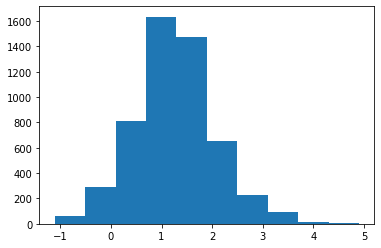

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df.query('magType == "ml"').mag)

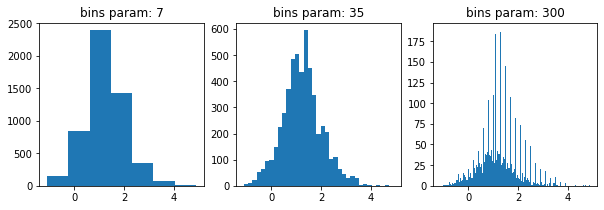

In [ ]:
x = df.query('magType == "ml"').mag
fig, axes = plt.subplots(1,3, figsize=(10,3))
for ax, bins in zip(axes, [7,35,300]):
  ax.hist(x,bins=bins)
  ax.set_title(f'bins param: {bins}')

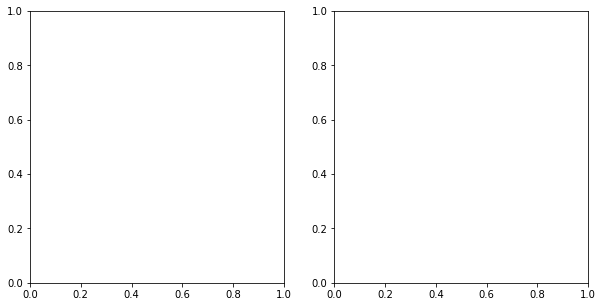

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (10,5))

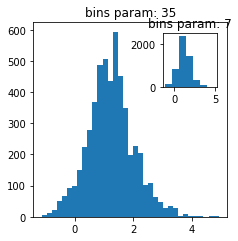

In [ ]:
fig = plt.figure(figsize = (3,3))
outside = fig.add_axes([0.1,0.1,0.9,0.9])
inside = fig.add_axes([0.7,0.7,0.25,0.25])
for ax, bins in zip([inside,outside], [7,35]):
  ax.hist(x,bins=bins)
  ax.set_title(f'bins param: {bins}')

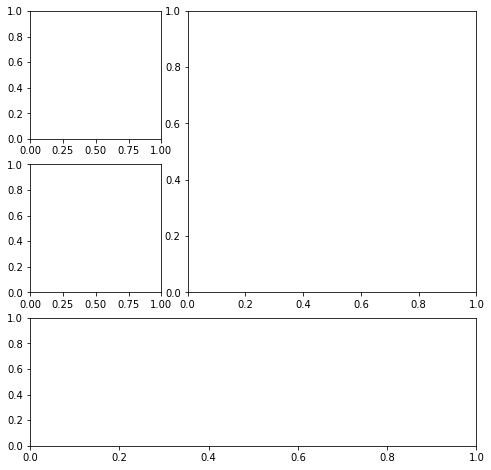

In [ ]:
fig = plt.figure(figsize = (8,8))
gs = fig.add_gridspec(3,3)
top_left = fig.add_subplot(gs[0,0])
mid_left = fig.add_subplot(gs[1,0])
top_right = fig.add_subplot(gs[:2,1:])
bottom = fig.add_subplot(gs[2,:])

In [ ]:
df

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
0,1.88,"12 km NNE of Ashford, Washington",1660089242240,1660103491750,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",uw61861622,",",uw,",",origin,phase-data,",36.0,0.009702,0.19,34.0,ml,earthquake,"M 1.9 - 12 km NNE of Ashford, Washington"
1,1.28,"22km SE of Pinnacles, CA",1660089223900,1660184892566,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nc73766110,",",nc,",",nearby-cities,origin,phase-data,scitech-link,",19.0,0.055000,0.05,118.0,md,earthquake,"M 1.3 - 22km SE of Pinnacles, CA"
2,0.66,"3km SE of The Geysers, CA",1660088926090,1660089550922,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nc73766105,",",nc,",",nearby-cities,origin,phase-data,scitech-link,",9.0,0.005412,0.03,107.0,md,earthquake,"M 0.7 - 3km SE of The Geysers, CA"
3,1.50,"9 km W of Point MacKenzie, Alaska",1660088817766,1660088924709,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ak022a5vqng0,",",ak,",",origin,phase-data,",NaN,NaN,0.53,NaN,ml,earthquake,"M 1.5 - 9 km W of Point MacKenzie, Alaska"
4,1.22,"15km ESE of Julian, CA",1660088628990,1660153271335,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci40078727,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",49.0,0.039130,0.19,55.0,ml,earthquake,"M 1.2 - 15km ESE of Julian, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003,4.70,South Sandwich Islands region,1657498134854,1658612174040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",us6000i3ng,",",us,",",origin,phase-data,",43.0,7.799000,0.51,69.0,mb,earthquake,M 4.7 - South Sandwich Islands region
9004,0.48,"6km W of Cobb, CA",1657497894350,1657571235978,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nc73757256,",",nc,",",nearby-cities,origin,phase-data,scitech-link,",19.0,0.011990,0.02,69.0,md,earthquake,"M 0.5 - 6km W of Cobb, CA"
9005,4.30,"96 km NE of Finschhafen, Papua New Guinea",1657497883070,1658715137040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",us6000i1gx,",",us,",",origin,phase-data,",53.0,14.129000,0.53,145.0,mb,earthquake,"M 4.3 - 96 km NE of Finschhafen, Papua New Guinea"
9006,1.35,"176 km W of Adak, Alaska",1657497868810,1657643944830,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",av91626931,",",av,",",origin,phase-data,",7.0,NaN,0.17,298.0,ml,earthquake,"M 1.4 - 176 km W of Adak, Alaska"


In [ ]:
pd.to_datetime(df.time)

0      1970-01-01 00:27:40.089242240
1      1970-01-01 00:27:40.089223900
2      1970-01-01 00:27:40.088926090
3      1970-01-01 00:27:40.088817766
4      1970-01-01 00:27:40.088628990
                    ...             
9003   1970-01-01 00:27:37.498134854
9004   1970-01-01 00:27:37.497894350
9005   1970-01-01 00:27:37.497883070
9006   1970-01-01 00:27:37.497868810
9007   1970-01-01 00:27:37.497860382
Name: time, Length: 8978, dtype: datetime64[ns]

In [ ]:
covid = pd.read_csv('cases_deaths_w_cont.csv')

In [ ]:
covid.head()

,Unnamed: 0,location,date,iso_code,continent,total_cases,new_cases,reproduction_rate,population,population_density,...,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,new_deaths,total_deaths,rate,inst_rate,d_per_density,d_per_p
0,0,Afghanistan,2020-03-31,AFG,Asia,166.0,5.433333,1.520000,40099462.0,54.422,...,9.59,0.5,64.83,0.511,0.444444,4.0,0.024096,0.081800,0.008167,1.108355e-08
1,1,Afghanistan,2020-04-30,AFG,Asia,1827.0,55.366667,1.504333,40099462.0,54.422,...,9.59,0.5,64.83,0.511,1.866667,60.0,0.032841,0.033715,0.034300,4.655092e-08
2,2,Afghanistan,2020-05-31,AFG,Asia,15180.0,430.741935,1.448710,40099462.0,54.422,...,9.59,0.5,64.83,0.511,6.258065,254.0,0.016733,0.014529,0.114991,1.560636e-07
3,3,Afghanistan,2020-06-30,AFG,Asia,31445.0,542.166667,0.973000,40099462.0,54.422,...,9.59,0.5,64.83,0.511,16.166667,739.0,0.023501,0.029819,0.297061,4.031642e-07
4,4,Afghanistan,2020-07-31,AFG,Asia,36628.0,167.193548,0.774194,40099462.0,54.422,...,9.59,0.5,64.83,0.511,17.290323,1275.0,0.034809,0.103415,0.317708,4.311859e-07


In [ ]:
covid.date = pd.to_datetime(covid.date)
covid = covid.set_index("date")

In [ ]:
covid.head()

,Unnamed: 0,location,iso_code,continent,total_cases,new_cases,reproduction_rate,population,population_density,median_age,...,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,new_deaths,total_deaths,rate,inst_rate,d_per_density,d_per_p
date,,,,,,,,,,,,,,,,,,,,,
2020-03-31,0,Afghanistan,AFG,Asia,166.0,5.433333,1.520000,40099462.0,54.422,18.6,...,9.59,0.5,64.83,0.511,0.444444,4.0,0.024096,0.081800,0.008167,1.108355e-08
2020-04-30,1,Afghanistan,AFG,Asia,1827.0,55.366667,1.504333,40099462.0,54.422,18.6,...,9.59,0.5,64.83,0.511,1.866667,60.0,0.032841,0.033715,0.034300,4.655092e-08
2020-05-31,2,Afghanistan,AFG,Asia,15180.0,430.741935,1.448710,40099462.0,54.422,18.6,...,9.59,0.5,64.83,0.511,6.258065,254.0,0.016733,0.014529,0.114991,1.560636e-07
2020-06-30,3,Afghanistan,AFG,Asia,31445.0,542.166667,0.973000,40099462.0,54.422,18.6,...,9.59,0.5,64.83,0.511,16.166667,739.0,0.023501,0.029819,0.297061,4.031642e-07
2020-07-31,4,Afghanistan,AFG,Asia,36628.0,167.193548,0.774194,40099462.0,54.422,18.6,...,9.59,0.5,64.83,0.511,17.290323,1275.0,0.034809,0.103415,0.317708,4.311859e-07


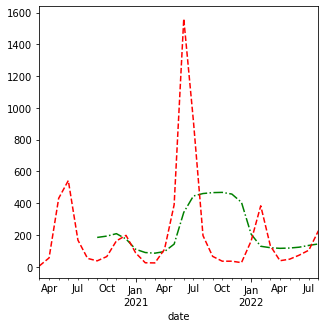

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
rolling = covid.query("location == 'Afghanistan'").new_cases.rolling(7).mean()
actual = covid.query("location == 'Afghanistan'").new_cases
rolling.plot(ax = ax, style='-.',color='green')
actual.plot(ax = ax, style = '--',color='red')

In [ ]:
covid.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

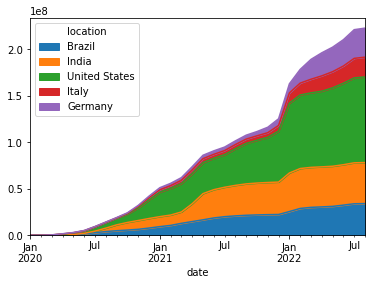

In [ ]:
countries = ['Brazil','India','United States','Italy','Germany']

covid.reset_index().pivot(
    index = 'date',
    columns = 'location',
    values = 'total_cases'
).loc[:,countries].plot(
    kind = 'area'
)

## Clustering vs. Regression

In [1]:
import pandas as pd

!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download daniboy370/world-data-by-country-2020
! unzip "world-data-by-country-2020.zip" -d ./world-data

import glob
files = glob.glob("./world-data/*.csv")

content = []

for filename in files:
    df = pd.read_csv(filename, index_col = None)
    content.append(df)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/20.8k [00:00<?, ?B/s]
100% 20.8k/20.8k [00:00<00:00, 13.9MB/s]
Archive:  world-data-by-country-2020.zip
  inflating: ./world-data/Fertility.csv  
  inflating: ./world-data/GDP per capita.csv  
  inflating: ./world-data/Life expectancy.csv  
  inflating: ./world-data/Meat consumption.csv  
  inflating: ./world-data/Median age.csv  
  inflating: ./world-data/Population growth.csv  
  inflating: ./world-data/Sex-ratio.csv  
  inflating: ./world-data/Suicide rate.csv  
  inflating: ./world-data/Urbanization rate.csv  


In [2]:
from functools import reduce
df_merged = reduce(lambda left, right: pd.merge(left,right, on=["Country",'ISO-code'], how = 'outer'), content)

In [ ]:
df_merged

,Country,Life expectancy,ISO-code,Sex-ratio,Population growth,Median age,Suicide rate,Urbanization rate,Fertility,Meat consumption,GDP per capita
0,Afghanistan,64.5,AFG,1.03,2.41,27.4,6.4,26.0,4.5,17.3,2182.0
1,Algeria,76.7,DZA,1.03,1.89,28.1,3.3,73.7,3.0,18.3,16091.0
2,Andorra,81.8,AND,1.06,0.63,44.3,NaN,87.9,1.3,NaN,NaN
3,Angola,60.8,AGO,0.95,3.12,15.9,8.9,66.8,5.5,19.0,6763.0
4,Antigua and Barbuda,76.9,ATG,0.89,1.03,31.9,0.5,24.4,2.0,56.0,30593.0
...,...,...,...,...,...,...,...,...,...,...,...
739,Niue,NaN,NIU,NaN,NaN,NaN,NaN,46.2,NaN,NaN,NaN
740,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.6,NaN
741,French Guiana,NaN,GUF,NaN,NaN,NaN,NaN,NaN,NaN,13.2,NaN
742,Guadeloupe,NaN,GLP,NaN,NaN,NaN,NaN,NaN,NaN,12.7,NaN


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 743
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            744 non-null    object 
 1   Life expectancy    696 non-null    float64
 2   ISO-code           741 non-null    object 
 3   Sex-ratio          737 non-null    float64
 4   Population growth  718 non-null    float64
 5   Median age         735 non-null    float64
 6   Suicide rate       693 non-null    float64
 7   Urbanization rate  729 non-null    float64
 8   Fertility          712 non-null    float64
 9   Meat consumption   699 non-null    float64
 10  GDP per capita     702 non-null    float64
dtypes: float64(9), object(2)
memory usage: 69.8+ KB


In [3]:
df_merged = df_merged.drop(index = df_merged[df_merged['ISO-code'].isna()].index)

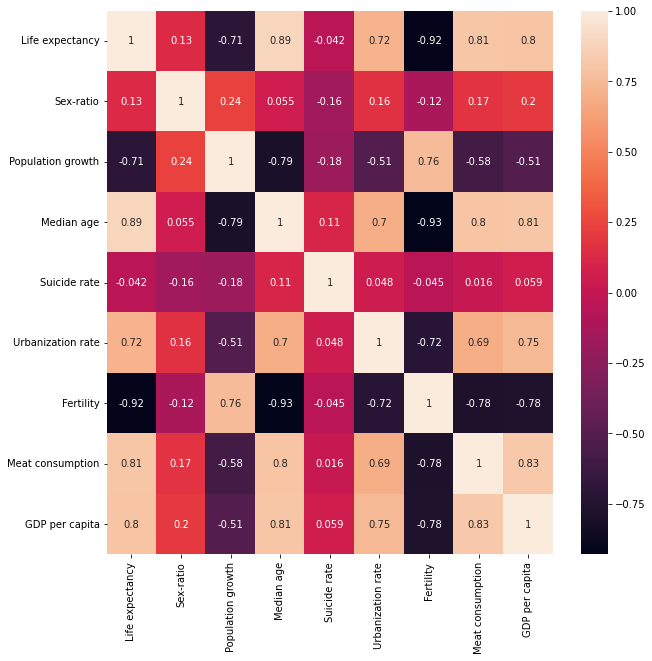

In [ ]:
import seaborn as sns
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_merged.corr(),annot=True,ax=ax)

In [4]:
X = df_merged.drop(columns = ['Country','ISO-code'])

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
pipe = make_pipeline(
    MinMaxScaler(),
    KNNImputer(),
    PCA()
)
pipe.fit(X)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('knnimputer', KNNImputer()),
                ('pca', PCA())])

<BarContainer object of 9 artists>

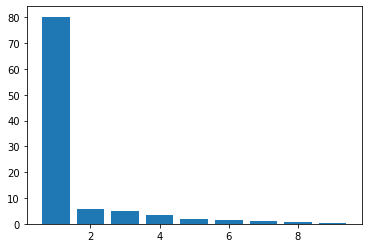

In [ ]:
per_var = np.round(pipe.named_steps.pca.explained_variance_ratio_*100, 1)
plt.bar(range(1,len(per_var)+1),per_var)

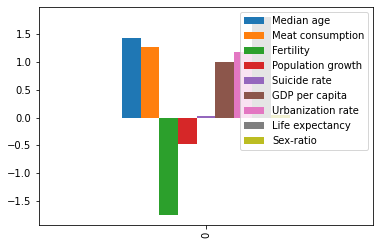

In [14]:
pd.DataFrame(1/0.2817754*pipe.named_steps.pca.components_[0].reshape(1,-1),columns = X.columns).plot(kind='bar')

In [ ]:
for_clustering = df_merged[['GDP per capita','Population growth','Urbanization rate']]

In [ ]:
pipe.fit(for_clustering)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('knnimputer', KNNImputer()),
                ('pca', PCA())])

<BarContainer object of 3 artists>

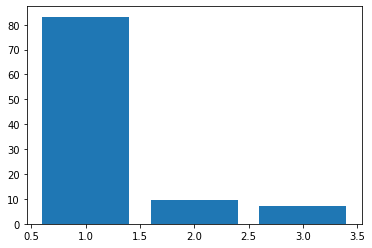

In [ ]:
per_var = np.round(pipe.named_steps.pca.explained_variance_ratio_*100, 1)
plt.bar(range(1,len(per_var)+1),per_var)

In [ ]:
pd.DataFrame(pipe.named_steps.pca.components_[0].reshape(1,-1),columns = for_clustering.columns)

,GDP per capita,Population growth,Urbanization rate
0,0.567592,-0.200557,0.798509


In [ ]:
pca_transform = pipe.transform(for_clustering)
pca_transform

array([[-0.22102973,  0.0871616 , -0.00439901],
       [ 0.27755004, -0.12279081,  0.009482  ],
       [ 0.52310558, -0.06156224, -0.04977918],
       ...,
       [-0.00566591, -0.00584932, -0.00158866],
       [-0.00566591, -0.00584932, -0.00158866],
       [-0.00566591, -0.00584932, -0.00158866]])

In [ ]:
dev_index = pd.DataFrame(pca_transform).iloc[:,0]

In [ ]:
dev_index

0     -0.221030
1      0.277550
2      0.523106
3      0.147109
4     -0.066632
         ...   
736    0.524132
737   -0.033517
738   -0.005666
739   -0.005666
740   -0.005666
Name: 0, Length: 741, dtype: float64

In [ ]:
residues = np.sqrt((pd.DataFrame(pca_transform).iloc[:,1].apply(lambda x: x**2) + pd.DataFrame(pca_transform).iloc[:,2].apply(lambda x: x**2))/2)

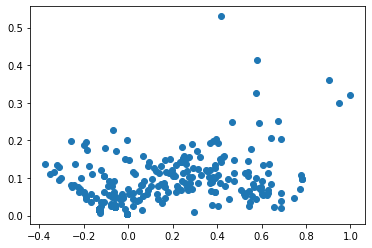

In [ ]:
plt.scatter(dev_index,residues)

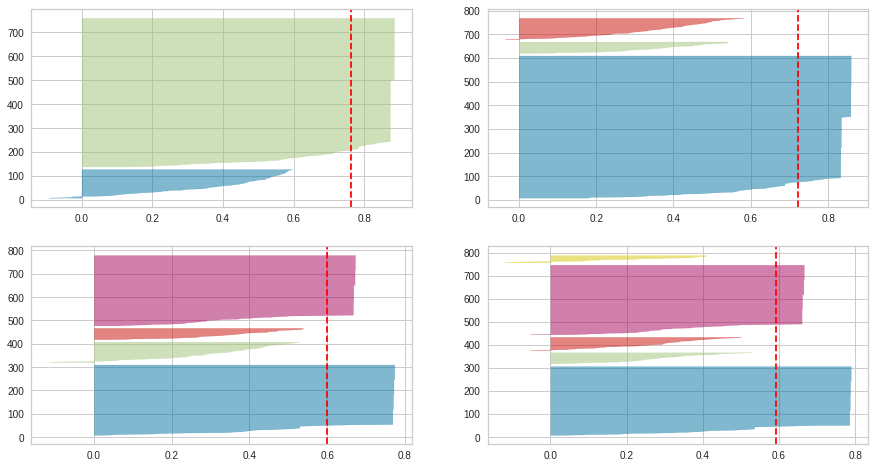

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2,2, figsize = (15,8))
for i in [2,3,4,5]:
  pipe_kmeans = make_pipeline(
      MinMaxScaler(),
      KNNImputer(),
      KMeans(n_clusters = i)
  )
  if i == 2:
    j = 0
    k = 0
  elif i ==3:
    j = 0
    k = 1
  elif i == 4:
    j = 1
    k = 0
  elif i == 5:
    j = 1
    k = 1
  pipe_kmeans.fit(for_clustering)
  visualizer = SilhouetteVisualizer(pipe_kmeans.named_steps.kmeans, colors = 'yellowbrick', ax = ax[j][k])
  pipe_vis = make_pipeline(
      MinMaxScaler(),
      KNNImputer(),
      visualizer
  )
  pipe_vis.fit(for_clustering)

In [ ]:
pipe_kmeans = make_pipeline(
    MinMaxScaler(),
    KNNImputer(),
    KMeans(n_clusters = 2)
)
clusters = pipe_kmeans.fit_predict(for_clustering)

In [ ]:
to_plot = pd.concat([pd.Series(dev_index), pd.Series(residues), pd.Series(clusters)],axis=1)

In [ ]:
to_plot.columns = ['a','b','c']

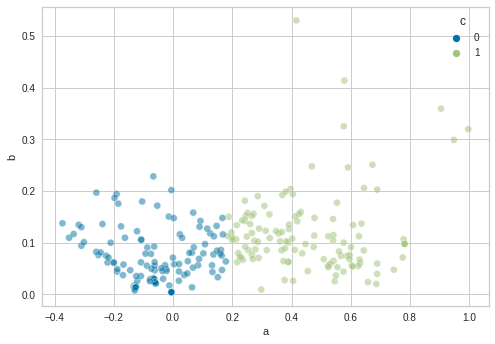

In [ ]:
sns.scatterplot(data=to_plot, x='a', y='b', hue='c', alpha = 0.5)

## Health Indicators set

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download alexteboul/heart-disease-health-indicators-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/2.66M [00:00<?, ?B/s]
100% 2.66M/2.66M [00:00<00:00, 148MB/s]


In [ ]:
!unzip heart-disease-health-indicators-dataset.zip

Archive:  heart-disease-health-indicators-dataset.zip
  inflating: heart_disease_health_indicators_BRFSS2015.csv  


In [ ]:
heart = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [ ]:
heart

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
heart = heart.sample(frac = 1).reset_index(drop = True) # reshuffling the data
y = heart.iloc[:,0]
X = heart.iloc[:,1:]

In [ ]:
len(y)

253680

In [ ]:
len(y[y==1.0])

23893

In [ ]:
y_trimmed = y[y==0.0].iloc[:23893]
X_trimmed = X[y==0.0].iloc[:23893]

In [ ]:
y_trimmed = pd.concat([y_trimmed,y[y==1.0]])
X_trimmed = pd.concat([X_trimmed,X[y==1.0]])

In [ ]:
temp = pd.concat([y_trimmed,X_trimmed],axis=1).sample(frac=1)

In [ ]:
X_trimmed = temp.iloc[:,1:]
y_trimmed = temp.iloc[:,0]

In [ ]:
y_trimmed

198295    1.0
86872     1.0
18141     0.0
124530    1.0
2848      0.0
         ... 
72636     1.0
242028    1.0
117406    1.0
26322     0.0
7040      0.0
Name: HeartDiseaseorAttack, Length: 47786, dtype: float64

In [ ]:
X_trimmed

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
198295,1.0,1.0,1.0,33.0,1.0,0.0,2.0,1.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,1.0,1.0,13.0,2.0,4.0
86872,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,8.0,1.0,1.0,10.0,6.0,8.0
18141,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,6.0,8.0
124530,0.0,1.0,1.0,27.0,0.0,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0
2848,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,10.0,20.0,1.0,1.0,2.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72636,0.0,1.0,1.0,30.0,1.0,0.0,2.0,1.0,1.0,1.0,...,1.0,0.0,4.0,30.0,5.0,0.0,0.0,9.0,5.0,5.0
242028,1.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,5.0,0.0,0.0,0.0,1.0,13.0,5.0,5.0
117406,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,4.0,2.0,15.0,1.0,0.0,8.0,5.0,5.0
26322,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,6.0,6.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
?RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trimmed,y_trimmed,test_size = 0.3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size = 0.3)

In [ ]:
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

'              precision    recall  f1-score   support\n\n         0.0       0.78      0.72      0.75      5068\n         1.0       0.74      0.80      0.77      4967\n\n    accuracy                           0.76     10035\n   macro avg       0.76      0.76      0.76     10035\nweighted avg       0.76      0.76      0.76     10035\n'

In [ ]:
print(classification_report(y_valid,rf.predict(X_valid)))

              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      5068
         1.0       0.74      0.80      0.77      4967

    accuracy                           0.76     10035
   macro avg       0.76      0.76      0.76     10035
weighted avg       0.76      0.76      0.76     10035

